In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

# Airlines Delay Datasets Analysis
In this analysis, we examine the three months of 6-7-8/2023 (summer months when the density of flights increases).

In [2]:
# documentation about features

docs = pd.read_csv('Documentation.csv')
docs

,SYS_FIELD_NAME,FIELD_DESC
0,YEAR,Year
1,QUARTER,Quarter (1-4)
2,MONTH,Month
3,DAY_OF_MONTH,Day of Month
4,DAY_OF_WEEK,Day of Week
5,FL_DATE,Flight Date (yyyymmdd)
6,OP_UNIQUE_CARRIER,Unique Carrier Code. When the same code has be...
7,OP_CARRIER_AIRLINE_ID,An identification number assigned by US DOT to...
8,OP_CARRIER,Code assigned by IATA and commonly used to ide...
9,TAIL_NUM,Tail Number


### Importing the data

In [3]:
data1 = pd.read_csv('JUNE_T_ONTIME_REPORTING.csv')
data2 = pd.read_csv('JULY_T_ONTIME_REPORTING.csv')
data3 = pd.read_csv('AUGUST_T_ONTIME_REPORTING.csv')

In [4]:
data1.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,...,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2023,2,6,1,4,6/1/2023 12:00:00 AM,9E,20363,9E,N131EV,...,39.0,24.0,1.0,83.0,1,NaN,NaN,NaN,NaN,NaN
1,2023,2,6,1,4,6/1/2023 12:00:00 AM,9E,20363,9E,N131EV,...,44.0,22.0,1.0,83.0,1,NaN,NaN,NaN,NaN,NaN
2,2023,2,6,1,4,6/1/2023 12:00:00 AM,9E,20363,9E,N131EV,...,41.0,22.0,1.0,83.0,1,NaN,NaN,NaN,NaN,NaN
3,2023,2,6,1,4,6/1/2023 12:00:00 AM,9E,20363,9E,N131EV,...,34.0,20.0,1.0,83.0,1,NaN,NaN,NaN,NaN,NaN
4,2023,2,6,1,4,6/1/2023 12:00:00 AM,9E,20363,9E,N131EV,...,53.0,37.0,1.0,152.0,1,NaN,NaN,NaN,NaN,NaN


In [5]:
data1.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM',
       'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID',
       'ORIGIN', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS', 'ORIGIN_STATE_NM',
       'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST',
       'DEST_CITY_NAME', 'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM',
       'DEST_WAC', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW',
       'DEP_DEL15', 'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'CRS_ARR_TIME',
       'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15',
       'ARR_DELAY_GROUP', 'ARR_TIME_BLK', 'CANCELLED', 'CANCELLATION_CODE',
       'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME',
       'FLIGHTS', 'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'],
      dtype='object')

## Deleting the rows without importance

In [6]:
# concatenation the 3 data sets
data = pd.concat([data1,data2,data3], ignore_index = True)

In [7]:
data.drop(['YEAR','QUARTER','FL_DATE','OP_UNIQUE_CARRIER','OP_CARRIER_AIRLINE_ID','TAIL_NUM','ORIGIN_AIRPORT_ID',
           'ORIGIN_AIRPORT_SEQ_ID','ORIGIN_STATE_FIPS','ORIGIN_STATE_NM','ORIGIN_WAC','DEST_AIRPORT_ID',
            'DEST_AIRPORT_SEQ_ID','DEST_CITY_NAME','DEST_STATE_FIPS','DEST_STATE_NM',
           'DEST_WAC'], axis = 1, inplace = True)

In [8]:
data.shape

(1782115, 37)

In [9]:
data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_STATE_ABR,DEST,DEST_STATE_ABR,CRS_DEP_TIME,...,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,6,1,4,9E,4726,ATL,GA,CSG,GA,1510,...,39.0,24.0,1.0,83.0,1,NaN,NaN,NaN,NaN,NaN
1,6,1,4,9E,4726,CSG,GA,ATL,GA,1650,...,44.0,22.0,1.0,83.0,1,NaN,NaN,NaN,NaN,NaN
2,6,1,4,9E,5061,ATL,GA,CSG,GA,1105,...,41.0,22.0,1.0,83.0,1,NaN,NaN,NaN,NaN,NaN
3,6,1,4,9E,5061,CSG,GA,ATL,GA,1240,...,34.0,20.0,1.0,83.0,1,NaN,NaN,NaN,NaN,NaN
4,6,1,4,9E,5107,ATL,GA,TYS,TN,1930,...,53.0,37.0,1.0,152.0,1,NaN,NaN,NaN,NaN,NaN


In [10]:
data.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,...,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,1.782115e+06,1.782115e+06,1.782115e+06,1.782115e+06,1.782115e+06,1.747664e+06,1.747643e+06,1.747643e+06,1.747643e+06,1.747643e+06,...,1.740004e+06,1.740004e+06,1782115.0,1.782115e+06,1.782115e+06,447787.000000,447787.000000,447787.000000,447787.000000,447787.000000
mean,7.014435e+00,1.591311e+01,3.981847e+00,2.324405e+03,1.338480e+03,1.338629e+03,1.811250e+01,2.079585e+01,2.595656e-01,4.717897e-01,...,1.404694e+02,1.147076e+02,1.0,8.414997e+02,3.835936e+00,26.527691,4.170525,13.093929,0.138206,31.982657
std,8.136746e-01,8.836267e+00,1.986398e+00,1.576311e+03,5.035416e+02,5.258220e+02,6.598010e+01,6.503606e+01,4.383964e-01,2.651037e+00,...,7.334729e+01,7.078099e+01,0.0,6.087854e+02,2.389837e+00,82.034264,30.069477,34.333673,3.055652,68.983617
min,6.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-5.900000e+01,0.000000e+00,0.000000e+00,-2.000000e+00,...,1.500000e+01,8.000000e+00,1.0,3.100000e+01,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000e+00,8.000000e+00,2.000000e+00,1.044000e+03,9.090000e+02,9.060000e+02,-5.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,...,8.600000e+01,6.300000e+01,1.0,3.990000e+02,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000e+00,1.600000e+01,4.000000e+00,2.085000e+03,1.327000e+03,1.327000e+03,-1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,...,1.230000e+02,9.700000e+01,1.0,6.790000e+02,3.000000e+00,5.000000,0.000000,0.000000,0.000000,8.000000
75%,8.000000e+00,2.400000e+01,6.000000e+00,3.374000e+03,1.750000e+03,1.759000e+03,1.600000e+01,1.600000e+01,1.000000e+00,1.000000e+00,...,1.720000e+02,1.440000e+02,1.0,1.072000e+03,5.000000e+00,23.000000,0.000000,15.000000,0.000000,37.000000
max,8.000000e+00,3.100000e+01,7.000000e+00,8.819000e+03,2.359000e+03,2.400000e+03,3.695000e+03,3.695000e+03,1.000000e+00,1.200000e+01,...,7.950000e+02,6.710000e+02,1.0,5.095000e+03,1.100000e+01,3424.000000,1561.000000,1708.000000,805.000000,3581.000000


In [11]:
data['OP_CARRIER'].unique()

array(['9E', 'AA', 'AS', 'B6', 'DL', 'F9', 'G4', 'HA', 'MQ', 'NK', 'OH',
       'OO', 'UA', 'WN', 'YX'], dtype=object)

## Checking Missing Data

In [12]:
data.isnull().sum()

MONTH                        0
DAY_OF_MONTH                 0
DAY_OF_WEEK                  0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
ORIGIN_STATE_ABR             0
DEST                         0
DEST_STATE_ABR               0
CRS_DEP_TIME                 0
DEP_TIME                 34451
DEP_DELAY                34472
DEP_DELAY_NEW            34472
DEP_DEL15                34472
DEP_DELAY_GROUP          34472
DEP_TIME_BLK                 0
CRS_ARR_TIME                 0
ARR_TIME                 36449
ARR_DELAY                42111
ARR_DELAY_NEW            42111
ARR_DEL15                42111
ARR_DELAY_GROUP          42111
ARR_TIME_BLK                 0
CANCELLED                    0
CANCELLATION_CODE      1746118
DIVERTED                     0
CRS_ELAPSED_TIME             0
ACTUAL_ELAPSED_TIME      42111
AIR_TIME                 42111
FLIGHTS                      0
DISTANCE                     0
DISTANCE_GROUP               0
CARRIER_

##### Visualising the missing data

<Axes: >

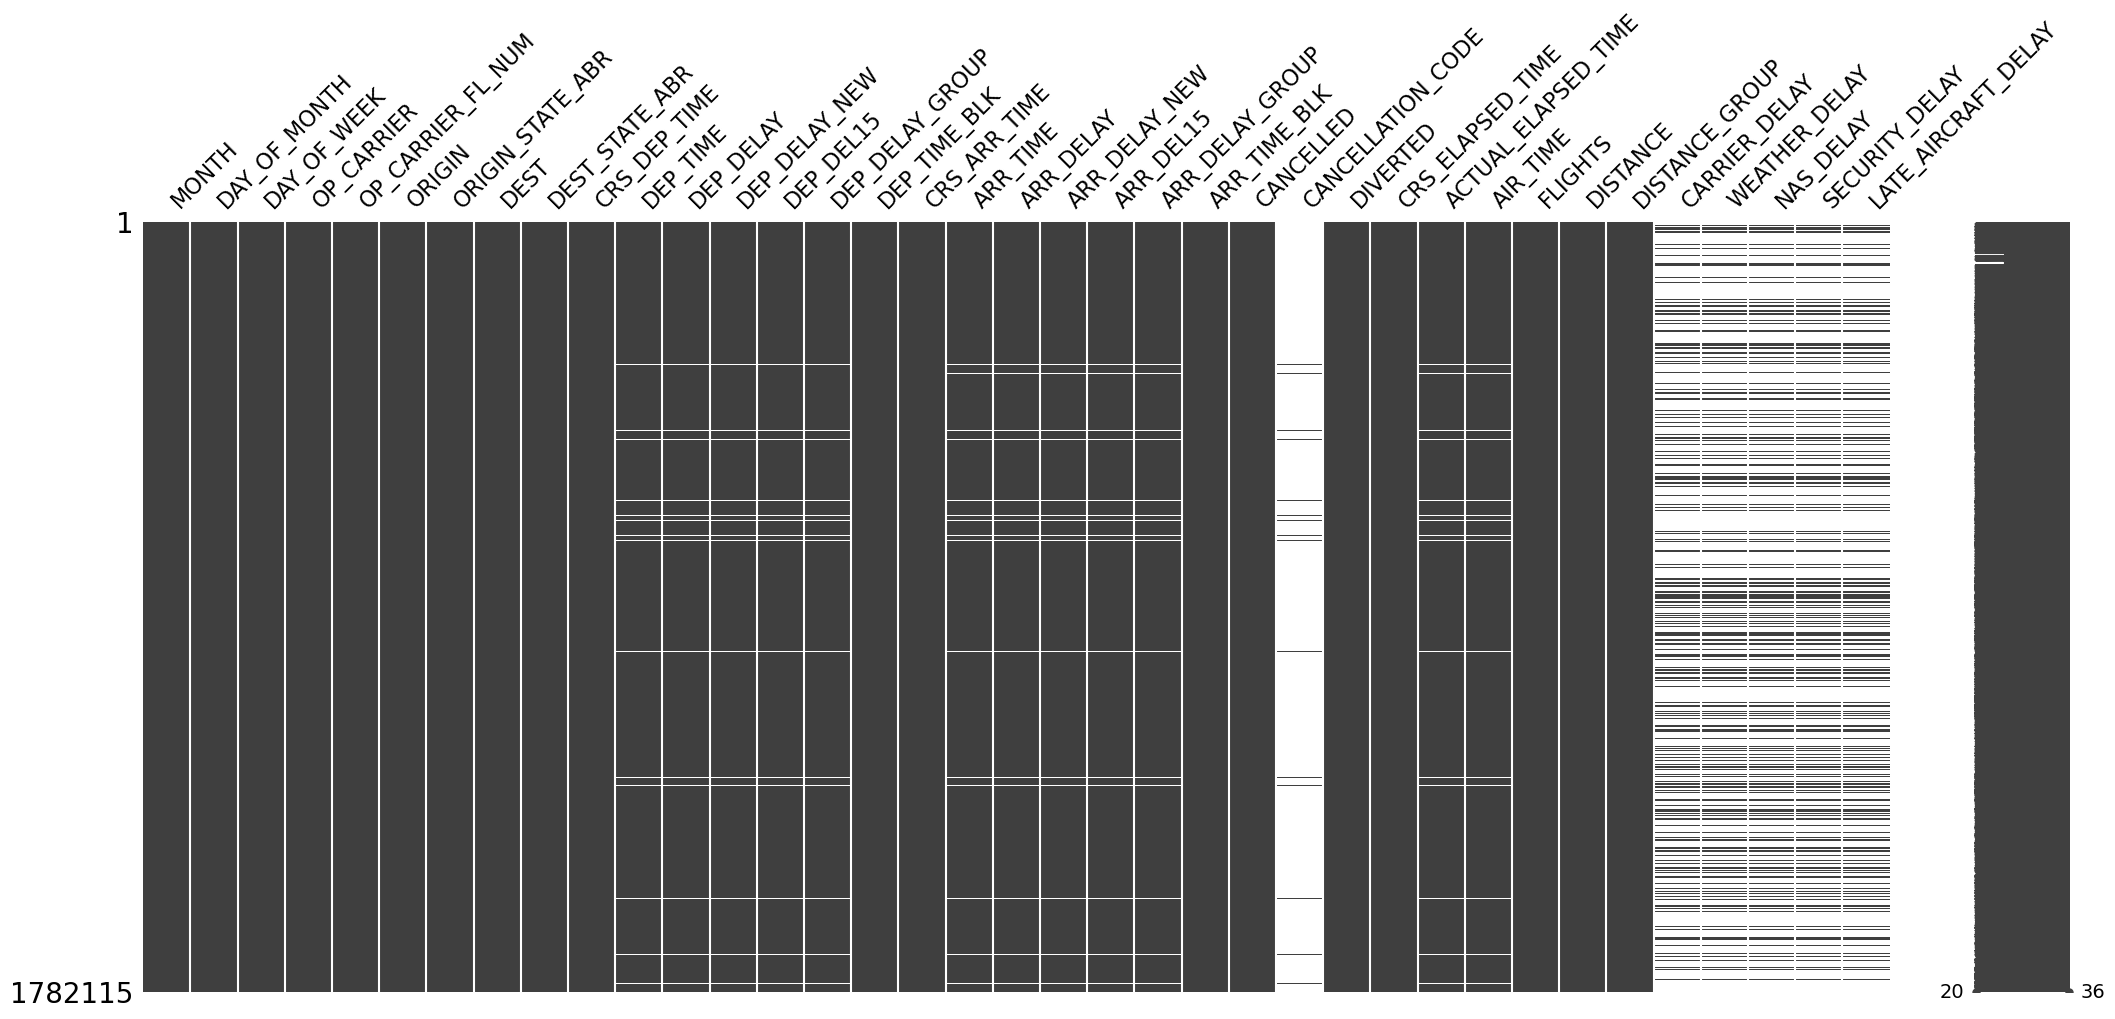

In [13]:
msno.matrix(data)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782115 entries, 0 to 1782114
Data columns (total 37 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY_OF_MONTH         int64  
 2   DAY_OF_WEEK          int64  
 3   OP_CARRIER           object 
 4   OP_CARRIER_FL_NUM    int64  
 5   ORIGIN               object 
 6   ORIGIN_STATE_ABR     object 
 7   DEST                 object 
 8   DEST_STATE_ABR       object 
 9   CRS_DEP_TIME         int64  
 10  DEP_TIME             float64
 11  DEP_DELAY            float64
 12  DEP_DELAY_NEW        float64
 13  DEP_DEL15            float64
 14  DEP_DELAY_GROUP      float64
 15  DEP_TIME_BLK         object 
 16  CRS_ARR_TIME         int64  
 17  ARR_TIME             float64
 18  ARR_DELAY            float64
 19  ARR_DELAY_NEW        float64
 20  ARR_DEL15            float64
 21  ARR_DELAY_GROUP      float64
 22  ARR_TIME_BLK         object 
 23  CANCELLED            float64
 24

In [15]:
## Split dataset into delays on departure and on arrival and delete the rows with
## important data missing to make it faster to run the code

In [16]:
## For departures, delete the arrival time delay and cancellations informations
## Also delete the rows with missing data about the departure delay

In [17]:
cols = list(data.columns)
cols = cols[17:30]
cols

['ARR_TIME',
 'ARR_DELAY',
 'ARR_DELAY_NEW',
 'ARR_DEL15',
 'ARR_DELAY_GROUP',
 'ARR_TIME_BLK',
 'CANCELLED',
 'CANCELLATION_CODE',
 'DIVERTED',
 'CRS_ELAPSED_TIME',
 'ACTUAL_ELAPSED_TIME',
 'AIR_TIME',
 'FLIGHTS']

In [18]:
df_dep = data.drop(cols, axis = 1)

In [19]:
df_dep

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_STATE_ABR,DEST,DEST_STATE_ABR,CRS_DEP_TIME,...,DEP_DELAY_GROUP,DEP_TIME_BLK,CRS_ARR_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,6,1,4,9E,4726,ATL,GA,CSG,GA,1510,...,-1.0,1500-1559,1604,83.0,1,NaN,NaN,NaN,NaN,NaN
1,6,1,4,9E,4726,CSG,GA,ATL,GA,1650,...,-1.0,1600-1659,1749,83.0,1,NaN,NaN,NaN,NaN,NaN
2,6,1,4,9E,5061,ATL,GA,CSG,GA,1105,...,-1.0,1100-1159,1155,83.0,1,NaN,NaN,NaN,NaN,NaN
3,6,1,4,9E,5061,CSG,GA,ATL,GA,1240,...,-1.0,1200-1259,1336,83.0,1,NaN,NaN,NaN,NaN,NaN
4,6,1,4,9E,5107,ATL,GA,TYS,TN,1930,...,-1.0,1900-1959,2028,152.0,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1782110,8,31,4,YX,5684,JFK,NY,ACK,MA,1055,...,-1.0,1000-1059,1211,199.0,1,NaN,NaN,NaN,NaN,NaN
1782111,8,31,4,YX,5703,ACK,MA,LGA,NY,1258,...,-1.0,1200-1259,1425,202.0,1,NaN,NaN,NaN,NaN,NaN
1782112,8,31,4,YX,5797,LGA,NY,BOS,MA,2000,...,-1.0,2000-2059,2130,184.0,1,NaN,NaN,NaN,NaN,NaN
1782113,8,31,4,YX,3489,PIT,PA,IAD,VA,615,...,1.0,0600-0659,723,182.0,1,27.0,0.0,0.0,0.0,0.0


In [20]:
## Departure time is already a float, so delete all the rows the value is missing

In [21]:
df_dep.dropna(subset ='DEP_TIME', inplace = True)

In [22]:
df_dep.isnull().sum()

MONTH                        0
DAY_OF_MONTH                 0
DAY_OF_WEEK                  0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
ORIGIN_STATE_ABR             0
DEST                         0
DEST_STATE_ABR               0
CRS_DEP_TIME                 0
DEP_TIME                     0
DEP_DELAY                   21
DEP_DELAY_NEW               21
DEP_DEL15                   21
DEP_DELAY_GROUP             21
DEP_TIME_BLK                 0
CRS_ARR_TIME                 0
DISTANCE                     0
DISTANCE_GROUP               0
CARRIER_DELAY          1299877
WEATHER_DELAY          1299877
NAS_DELAY              1299877
SECURITY_DELAY         1299877
LATE_AIRCRAFT_DELAY    1299877
dtype: int64

In [23]:
df_dep.dropna(subset = 'DEP_DELAY', inplace = True)

In [24]:
df_dep.isnull().sum()

MONTH                        0
DAY_OF_MONTH                 0
DAY_OF_WEEK                  0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
ORIGIN_STATE_ABR             0
DEST                         0
DEST_STATE_ABR               0
CRS_DEP_TIME                 0
DEP_TIME                     0
DEP_DELAY                    0
DEP_DELAY_NEW                0
DEP_DEL15                    0
DEP_DELAY_GROUP              0
DEP_TIME_BLK                 0
CRS_ARR_TIME                 0
DISTANCE                     0
DISTANCE_GROUP               0
CARRIER_DELAY          1299856
WEATHER_DELAY          1299856
NAS_DELAY              1299856
SECURITY_DELAY         1299856
LATE_AIRCRAFT_DELAY    1299856
dtype: int64

In [25]:
cols = list(data.columns)
cols = cols[10:16] + cols[23:30]
cols

['DEP_TIME',
 'DEP_DELAY',
 'DEP_DELAY_NEW',
 'DEP_DEL15',
 'DEP_DELAY_GROUP',
 'DEP_TIME_BLK',
 'CANCELLED',
 'CANCELLATION_CODE',
 'DIVERTED',
 'CRS_ELAPSED_TIME',
 'ACTUAL_ELAPSED_TIME',
 'AIR_TIME',
 'FLIGHTS']

In [26]:
df_arr = data.drop(cols, axis=1)

In [27]:
df_arr.dropna(subset = 'ARR_DELAY', inplace = True)

In [28]:
df_arr.isnull().sum()

MONTH                        0
DAY_OF_MONTH                 0
DAY_OF_WEEK                  0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
ORIGIN_STATE_ABR             0
DEST                         0
DEST_STATE_ABR               0
CRS_DEP_TIME                 0
CRS_ARR_TIME                 0
ARR_TIME                     0
ARR_DELAY                    0
ARR_DELAY_NEW                0
ARR_DEL15                    0
ARR_DELAY_GROUP              0
ARR_TIME_BLK                 0
DISTANCE                     0
DISTANCE_GROUP               0
CARRIER_DELAY          1292217
WEATHER_DELAY          1292217
NAS_DELAY              1292217
SECURITY_DELAY         1292217
LATE_AIRCRAFT_DELAY    1292217
dtype: int64

In [29]:
## Keep the data about cause of delay for further analysis. When the flight is not delayed
## at arrival, there is no data about the cause of delay, the reason for so many missing values

In [30]:
### Analysing Correlation between Airlines and Delay

In [31]:
df_dep.groupby('OP_CARRIER')['DEP_DELAY'].mean()

OP_CARRIER
9E    11.781018
AA    27.016572
AS     8.362288
B6    37.484968
DL    16.420680
F9    32.796546
G4    19.379228
HA     7.638608
MQ     8.847601
NK    27.367276
OH    15.036544
OO     9.776726
UA    21.152464
WN    15.808467
YX     8.075966
Name: DEP_DELAY, dtype: float64

In [32]:
carriers = list(data['OP_CARRIER'].unique())
carriers

['9E',
 'AA',
 'AS',
 'B6',
 'DL',
 'F9',
 'G4',
 'HA',
 'MQ',
 'NK',
 'OH',
 'OO',
 'UA',
 'WN',
 'YX']

[Text(0.5, 1.0, 'Average Delay per Carrier (minutes)')]

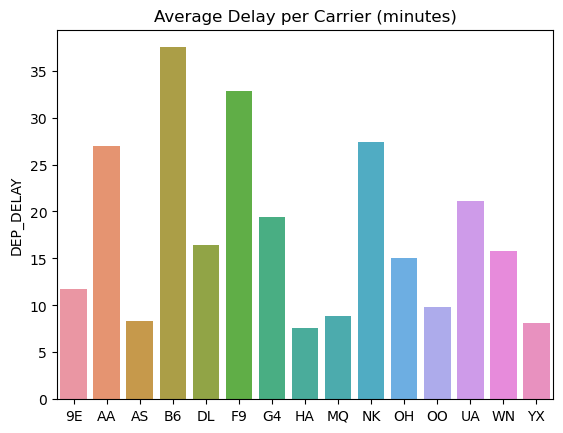

In [33]:
sns.barplot(x = carriers, y = df_dep.groupby('OP_CARRIER')['DEP_DELAY'].mean()).set(title = 'Average'
                                                                                    ' Delay per Carrier (minutes)')

In [34]:
df_dep.groupby('OP_CARRIER')['DEP_DEL15'].sum()

OP_CARRIER
9E      8941.0
AA     70804.0
AS     13425.0
B6     26160.0
DL     61600.0
F9     16911.0
G4      8574.0
HA      3559.0
MQ     10001.0
NK     22450.0
OH     10629.0
OO     25562.0
UA     51604.0
WN    113079.0
YX     10329.0
Name: DEP_DEL15, dtype: float64

In [35]:
df_dep.groupby('OP_CARRIER')['DEP_DEL15'].count()

OP_CARRIER
9E     50817
AA    245294
AS     66839
B6     65625
DL    260828
F9     42275
G4     32226
HA     20695
MQ     56700
NK     62449
OH     49392
OO    169832
UA    187913
WN    367503
YX     69255
Name: DEP_DEL15, dtype: int64

In [36]:
perc_del = (df_dep.groupby('OP_CARRIER')['DEP_DEL15'].sum()/df_dep.groupby('OP_CARRIER')['DEP_DEL15'].count())*100

perc_del

OP_CARRIER
9E    17.594506
AA    28.864954
AS    20.085579
B6    39.862857
DL    23.617096
F9    40.002365
G4    26.605846
HA    17.197391
MQ    17.638448
NK    35.949335
OH    21.519679
OO    15.051345
UA    27.461644
WN    30.769545
YX    14.914447
Name: DEP_DEL15, dtype: float64

[Text(0.5, 1.0, '% of flights delayed more than 15 minutes on departure per carrier')]

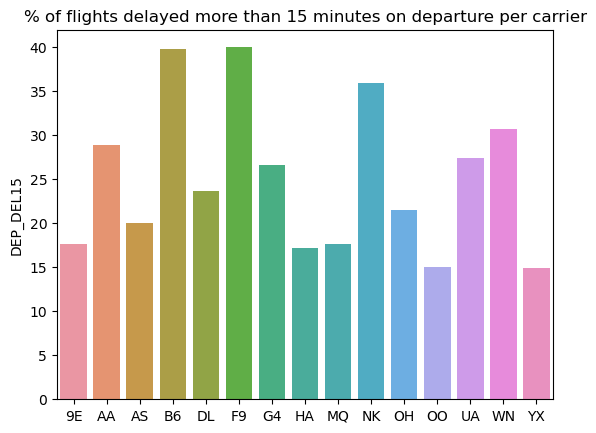

In [37]:
sns.barplot(x = carriers, y = perc_del).set(title = '% of flights delayed more than 15 minutes '
                                            'on departure per carrier')

In [38]:
df_dep.loc[df_dep['DEP_DEL15'] == 1].groupby('OP_CARRIER')['DEP_DELAY'].mean()

OP_CARRIER
9E    83.159937
AA    99.401672
AS    54.417654
B6    98.174197
DL    75.006494
F9    86.086807
G4    86.888850
HA    50.010958
MQ    62.532747
NK    79.106192
OH    86.651331
OO    86.123817
UA    82.131017
WN    50.297049
YX    80.711782
Name: DEP_DELAY, dtype: float64

[Text(0.5, 1.0, 'Average Delay for Flights Delayed More Than 15 minutes')]

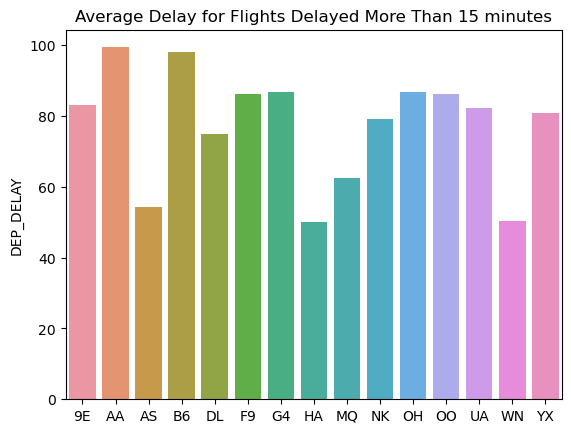

In [39]:
sns.barplot(x = carriers, y = df_dep.loc[df_dep['DEP_DEL15'] == 1].groupby
            ('OP_CARRIER')['DEP_DELAY'].mean()).set(title = 'Average Delay for Flights Delayed More '
                                                    'Than 15 minutes')

In [40]:
## Number of origins

origins = len(list(data['ORIGIN'].unique()))
print("Number of the Origin Airport:", origins)

Number of the Origin Airport: 340


In [41]:
perc_del_ori = (df_dep.groupby('ORIGIN')['DEP_DEL15'].sum()/df_dep.groupby('ORIGIN')['DEP_DEL15'].count())*100
perc_del_ori = perc_del_ori.sort_values(ascending = False)

In [42]:
perc_del_ori[0:50]

ORIGIN
SMX    69.230769
ERI    50.000000
BQN    48.175182
SCK    47.407407
HGR    45.205479
USA    45.108696
BRW    43.820225
SPI    43.478261
FLL    41.245439
HTS    40.437158
PSE    39.933993
BWI    38.807915
MCO    38.393038
PBG    38.372093
MDW    36.594852
SJU    36.560917
PSM    36.458333
DEN    35.007649
MIA    34.107056
LBE    34.090909
BET    34.090909
ISP    33.742911
ORH    33.522727
EWR    33.010250
SWF    32.727273
TTN    32.562620
LAS    31.947634
MVY    31.615120
PAE    31.250000
CLT    30.583388
PBI    30.211082
DAL    30.182689
DFW    29.950392
AVL    29.417323
ATL    29.265084
STL    29.180492
TPA    28.920514
BOS    28.734817
CMX    28.654971
TOL    28.571429
BLV    28.529412
JFK    28.444403
HYA    28.402367
IAG    28.358209
BUF    28.111046
MCW    27.922078
FOD    27.922078
RFD    27.702703
STT    27.688172
IAH    27.530364
Name: DEP_DEL15, dtype: float64

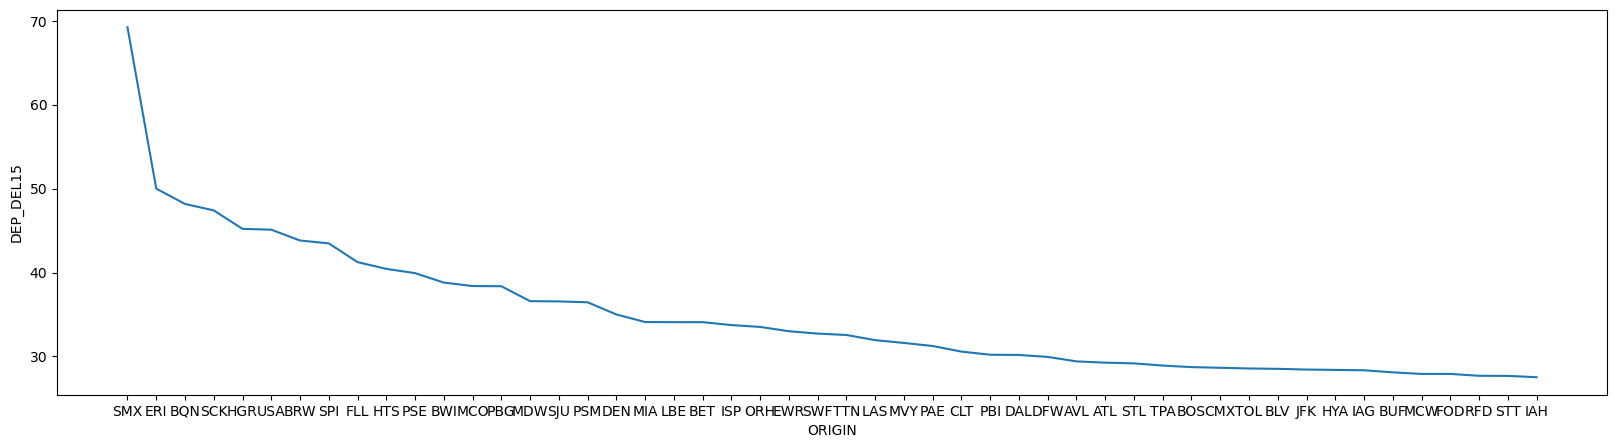

In [43]:
#Graph with the airports with most delays in % of flights

fig = plt.subplots(figsize = (20,5))
ax1 = sns.lineplot(perc_del_ori[0:50])
plt.show()

## Feature Engineering
#### Using Label Encoder
We used label encoder here because other methods increased the number of columns and since there were too many columns in this data set, methods other than label encoder did not work.

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [45]:
dt = df_dep[['DAY_OF_WEEK','OP_CARRIER','ORIGIN','DEST','DEP_TIME_BLK']]

In [46]:
dt.shape

(1747643, 5)

In [47]:
dt['OP_CARRIER'] = le.fit_transform(dt['OP_CARRIER'])
dt['ORIGIN'] = le.fit_transform(dt['ORIGIN'])
dt['DEST'] = le.fit_transform(dt['DEST'])
dt['DEP_TIME_BLK'] = le.fit_transform(dt['DEP_TIME_BLK'])

## Splitting the data

In [75]:
X = dt
y = df_dep['DEP_DEL15']

X.shape, y.shape

((1747643, 5), (1747643,))

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42) 

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1747643, 5), (1747643,), (1310732, 5), (436911, 5), (1310732,), (436911,))

## ML Models Implementation

## Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier       # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn import metrics                           # Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

In [51]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 10,random_state = 0)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [52]:
# Model Accuracy, how often is the classifier correct?
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.75


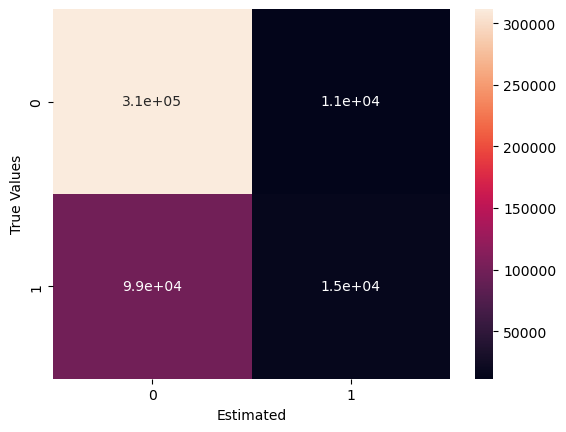

In [53]:
from sklearn.metrics import confusion_matrix

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
plt.xlabel('Estimated')
plt.ylabel('True Values')
plt.show()

## Random Forest

In [77]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf_RF = RandomForestClassifier(n_estimators = 10)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_RF.fit(X_train, y_train)

y_pred = clf_RF.predict(X_test)

In [78]:
# Random Forest accurarcy score
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.73


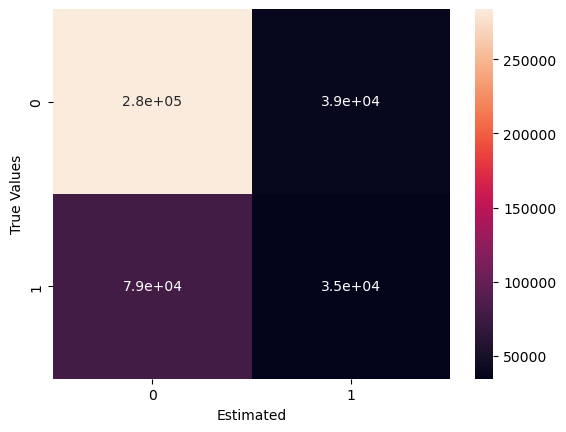

In [79]:
# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)
plt.xlabel('Estimated')
plt.ylabel('True Values')
plt.show()

## Checking results tuning Hyperparameters and using Cross Validation

In [80]:
from sklearn.model_selection import RandomizedSearchCV

In [107]:
param_dist = {'n_estimators': [5,10,25],
              'max_depth': [3,5,7]}
rf = RandomForestClassifier()
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=9, 
                                 cv=5)

In [108]:
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=9,
                   param_distributions={'max_depth': [3, 5, 7],
                                        'n_estimators': [5, 10, 25]})

In [109]:
best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'n_estimators': 25, 'max_depth': 7}


In [113]:
rand_search.cv_results_['mean_test_score']

array([0.74086694, 0.74086694, 0.74086694, 0.74290015, 0.741269  ,
       0.74154137, 0.74501652, 0.74528813, 0.74534459])

In [114]:
rand_search.cv_results_['mean_test_score'].mean()

0.7426622850007204

### All models with different parameters and using cross validation give us an accuracy of around 74%
#### The best model is with the parameters N_estimators = 25 and max_depth = 7

## kNN

In [115]:
X = dt
y = df_dep['DEP_DEL15']

X.shape, y.shape

((1747643, 5), (1747643,))

### Because the ranges of the features are different, we need to normalise the data to apply kNN
### and get the best, balanced results - Datacamp tutorial

In [116]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [117]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [118]:
y_pred = knn.predict(X_test)

In [120]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7120868368575998


### Utilising 3 neighbours we got 71% accuracy. Now let's use cross validation

In [123]:
score = cross_val_score(knn, X, y, cv=5)

In [128]:
print(score)
print(score.mean())

[0.69954138 0.71407809 0.71705352 0.71248655 0.69649928]
0.7079317647381661


### Using cross validation, the average accuracy was approximately 70%

## Lets explore how the model works utilising different k parameters and cross validation

In [129]:
k_values = [i for i in [3,5,10,20]]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

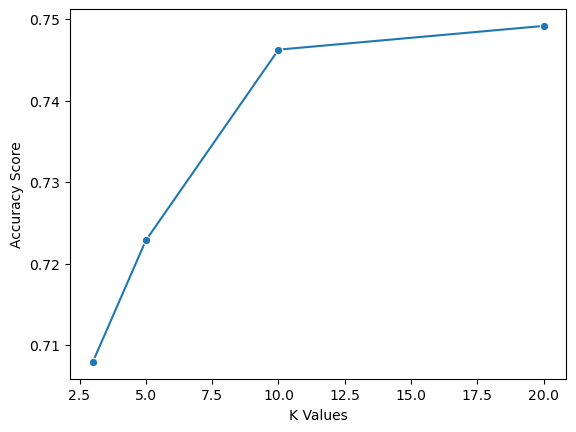

In [130]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

### Visualising the results of the best model, k = 20

In [131]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [132]:
# Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# Create KNN Classifier
kNN = KNeighborsClassifier(n_neighbors = 20)

# Train the model using the training sets
kNN.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = kNN.predict(X_test)

In [133]:
# kNN accurarcy score
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.75


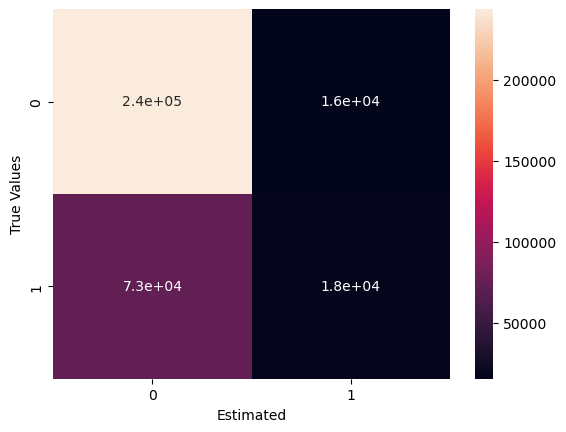

In [134]:
# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)
plt.xlabel('Estimated')
plt.ylabel('True Values')
plt.show()

## Using Scaling and PCA Methods

Before the using Scalin and PCA methods we got '0.73' accuracy of Random Forest and kNN models

## Using Scalin

In [60]:
from sklearn.preprocessing import StandardScaler

# Create an object using Standard scalscaler
scaler = StandardScaler()

# Train the StandardScaler model
scaler.fit(X_train)

# transform data
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)
X_scaled = scaler.transform(X)

## Using PCA

In [61]:
from sklearn.decomposition import PCA

# keep the first two principal components of the data
pca = PCA(n_components = 2)

# transform data into the first two principal components
X_pca = pca.fit_transform(X_scaled)

print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (1747643, 5)
Reduced shape: (1747643, 2)


In [62]:
# The amount of variance explained by each of the selected components.
print(pca.explained_variance_ratio_)

[0.2107718  0.20900569]


<Axes: >

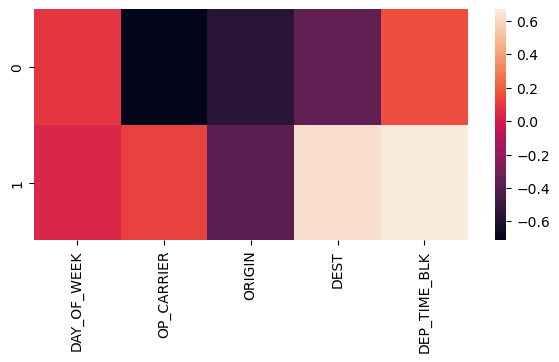

In [63]:
import seaborn as sns
df_comp = pd.DataFrame(pca.components_, columns = dt.columns)
  
plt.figure(figsize =(7, 3))
  
# plotting heatmap
sns.heatmap(df_comp)

## Apply to Decision Tree,Random Forest and kNN Models

### Decision Tree

In [64]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 10,random_state = 0)

# Train Decision Tree Classifer
clf = clf.fit(X_train_scaled, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_scaled)

In [65]:
# Model Accuracy, how often is the classifier correct?
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.75


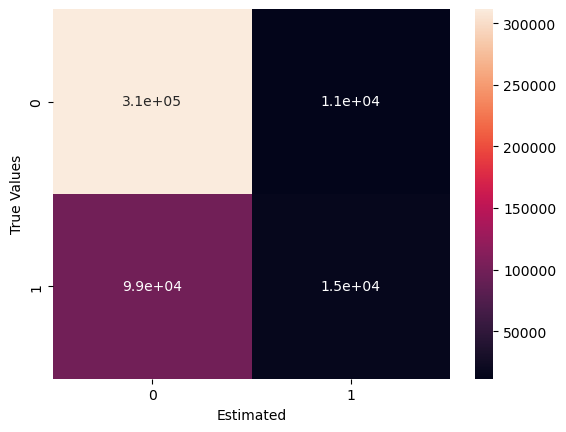

In [66]:
from sklearn.metrics import confusion_matrix

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
plt.xlabel('Estimated')
plt.ylabel('True Values')
plt.show()

### Random Forest

In [67]:
#Create a Gaussian Classifier
clf_RF = RandomForestClassifier(n_estimators = 10)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_RF.fit(X_train_scaled, y_train)

y_pred = clf_RF.predict(X_test_scaled)

In [68]:
# Random Forest accurarcy score
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.73


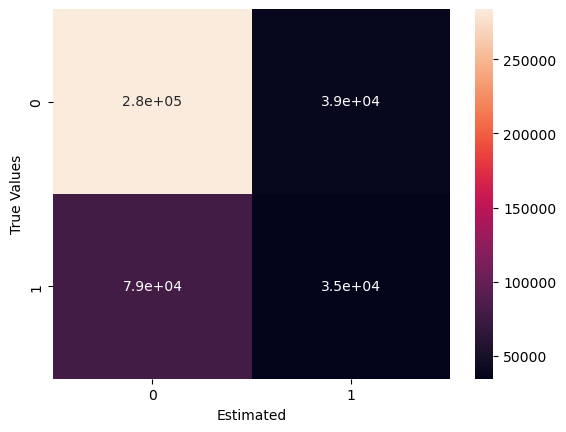

In [69]:
# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)
plt.xlabel('Estimated')
plt.ylabel('True Values')
plt.show()

### kNN

In [70]:
# Create KNN Classifier
kNN = KNeighborsClassifier(n_neighbors = 5)

# Train the model using the training sets
kNN.fit(X_train_scaled, y_train)

# Predict the response for test dataset
y_pred = kNN.predict(X_test_scaled)

In [71]:
# kNN accurarcy score
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.73


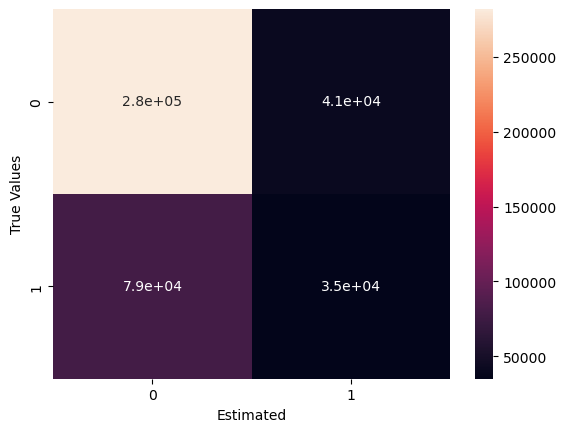

In [72]:
# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)
plt.xlabel('Estimated')
plt.ylabel('True Values')
plt.show()

#### In this case we are seeing the data structure is already well-separated between classes, so the score hasn't changed even after scaling and PCA operations.

# Referances

**** We need to put here dataset links
